In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

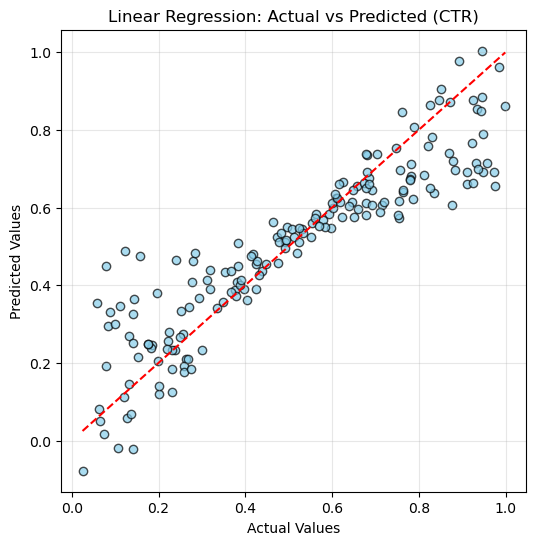

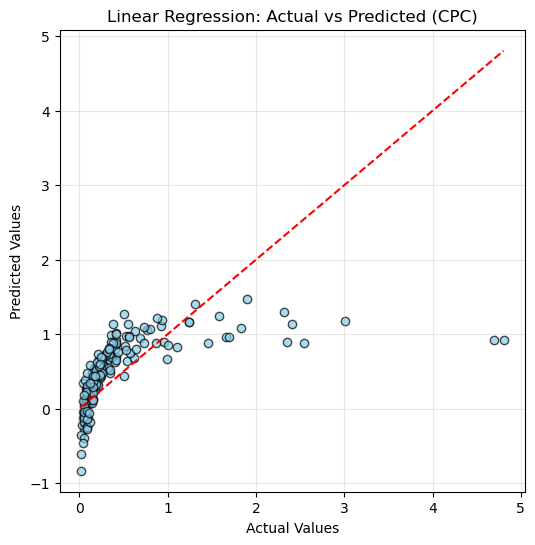

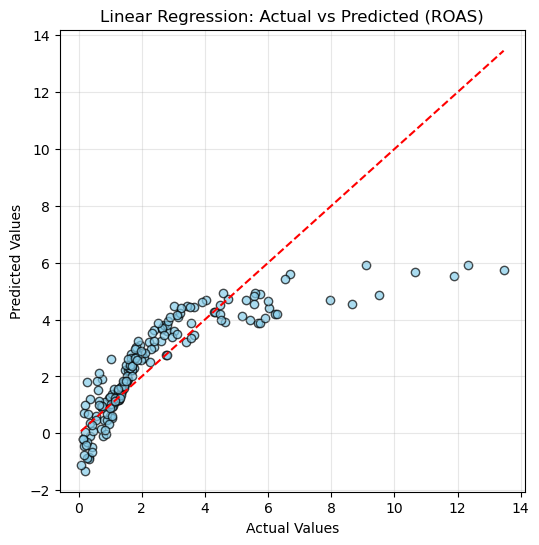

               Model Target      RMSE       MAE        R2
0  Linear Regression    CTR  0.116533  0.083915  0.817101
1  Linear Regression    CPC  0.566409  0.337546  0.320628
2  Linear Regression   ROAS  1.371431  0.862173  0.667010


In [6]:
# step1_linear_regression.py

# 1. Load Data
df = pd.read_csv('merged_ads_data.csv')

# 2. Preprocessing
df['Platform'] = df['Platform'].astype('category')
df['Campaign'] = df['Campaign'].astype('category')

X = df.drop(columns=['CTR', 'CPC', 'ROAS', 'Date'])
y = df[['CTR', 'CPC', 'ROAS']]

categorical_cols = ['Campaign', 'Platform']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression
results_lr = []
model = LinearRegression()

for target in ['CTR', 'CPC', 'ROAS']:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    
    pipe.fit(X_train, y_train[target])
    y_pred = pipe.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    mae = mean_absolute_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    
    results_lr.append({'Model': 'Linear Regression', 'Target': target,
                       'RMSE': rmse, 'MAE': mae, 'R2': r2})
    
    # 4. Visualization: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test[target], y_pred, alpha=0.7, color='skyblue', edgecolors='k')
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--')
    plt.title(f'Linear Regression: Actual vs Predicted ({target})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.show()

results_lr = pd.DataFrame(results_lr)
print(results_lr)


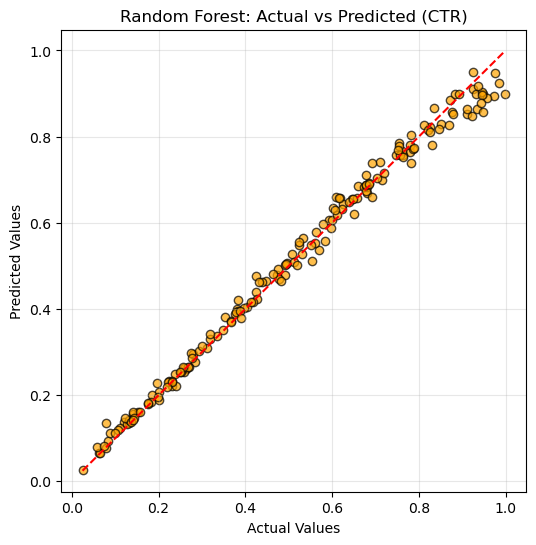

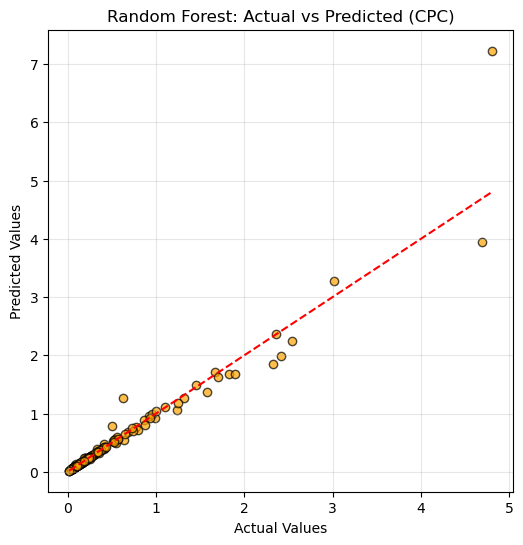

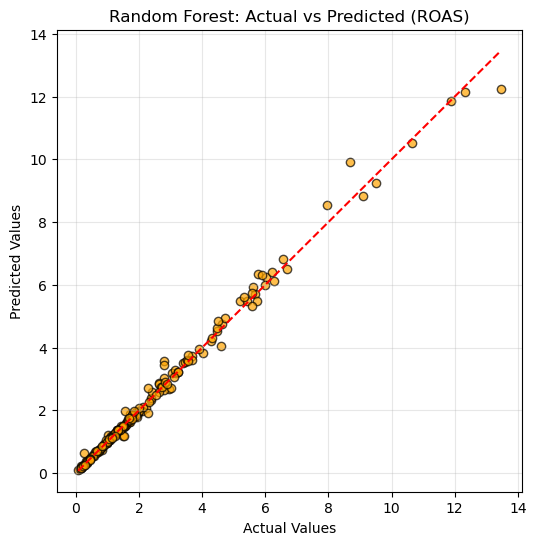

           Model Target      RMSE       MAE        R2
0  Random Forest    CTR  0.025974  0.018401  0.990914
1  Random Forest    CPC  0.206680  0.046016  0.909542
2  Random Forest   ROAS  0.212365  0.112317  0.992016


In [8]:
# step2_random_forest.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 1. Load Data
df = pd.read_csv('merged_ads_data.csv')

# 2. Preprocessing
df['Platform'] = df['Platform'].astype('category')
df['Campaign'] = df['Campaign'].astype('category')

X = df.drop(columns=['CTR', 'CPC', 'ROAS', 'Date'])
y = df[['CTR', 'CPC', 'ROAS']]

categorical_cols = ['Campaign', 'Platform']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest
results_rf = []
model = RandomForestRegressor(n_estimators=150, random_state=42)

for target in ['CTR', 'CPC', 'ROAS']:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    
    pipe.fit(X_train, y_train[target])
    y_pred = pipe.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    mae = mean_absolute_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    
    results_rf.append({'Model': 'Random Forest', 'Target': target,
                       'RMSE': rmse, 'MAE': mae, 'R2': r2})
    
    # 4. Visualization: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test[target], y_pred, alpha=0.7, color='orange', edgecolors='k')
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--')
    plt.title(f'Random Forest: Actual vs Predicted ({target})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.show()

results_rf = pd.DataFrame(results_rf)
print(results_rf)


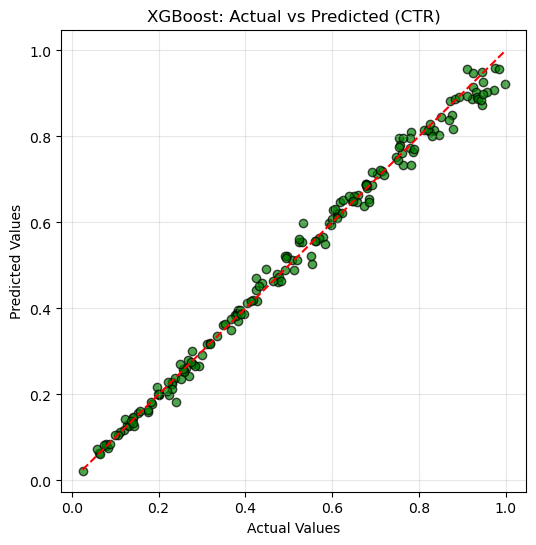

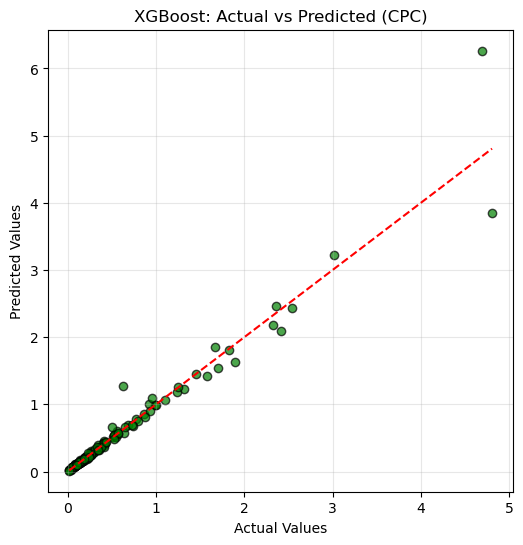

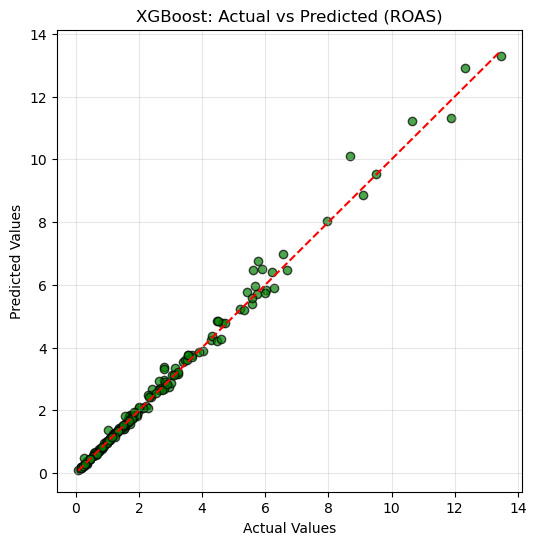

     Model Target      RMSE       MAE        R2
0  XGBoost    CTR  0.022964  0.016292  0.992897
1  XGBoost    CPC  0.154083  0.040099  0.949725
2  XGBoost   ROAS  0.213323  0.109163  0.991943


In [10]:
# step3_xgboost.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# 1. Load Data
df = pd.read_csv('merged_ads_data.csv')

# 2. Preprocessing
df['Platform'] = df['Platform'].astype('category')
df['Campaign'] = df['Campaign'].astype('category')

X = df.drop(columns=['CTR', 'CPC', 'ROAS', 'Date'])
y = df[['CTR', 'CPC', 'ROAS']]

categorical_cols = ['Campaign', 'Platform']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train XGBoost
results_xgb = []
model = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)

for target in ['CTR', 'CPC', 'ROAS']:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    
    pipe.fit(X_train, y_train[target])
    y_pred = pipe.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    mae = mean_absolute_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    
    results_xgb.append({'Model': 'XGBoost', 'Target': target,
                        'RMSE': rmse, 'MAE': mae, 'R2': r2})
    
    # 4. Visualization: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test[target], y_pred, alpha=0.7, color='green', edgecolors='k')
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--')
    plt.title(f'XGBoost: Actual vs Predicted ({target})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.show()

results_xgb = pd.DataFrame(results_xgb)
print(results_xgb)


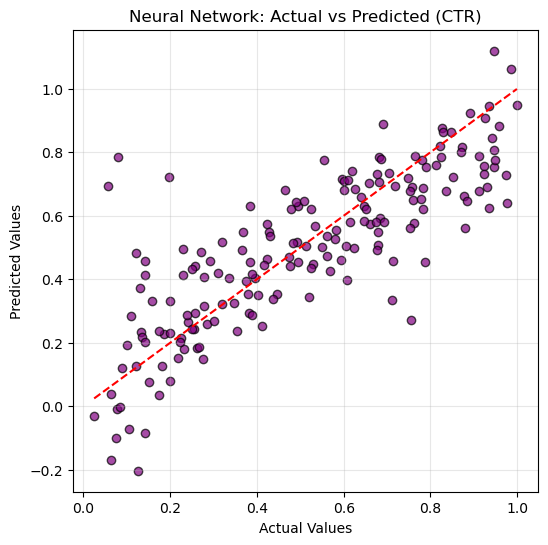

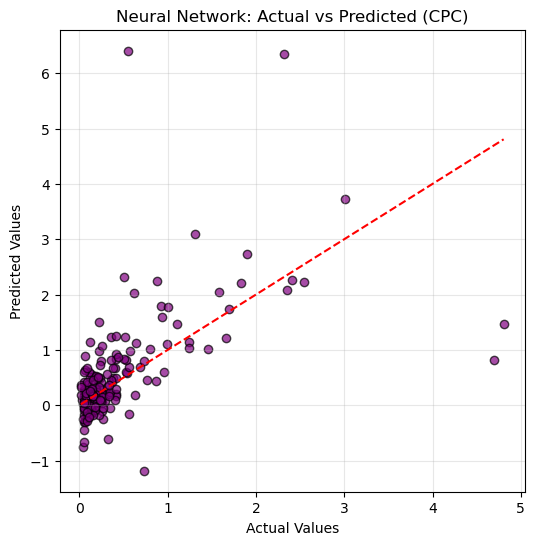

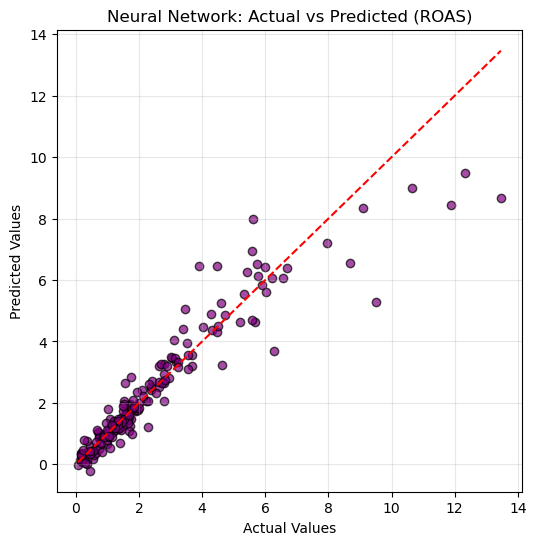

            Model Target      RMSE       MAE        R2
0  Neural Network    CTR  0.162963  0.120478  0.642324
1  Neural Network    CPC  0.792943  0.400473 -0.331470
2  Neural Network   ROAS  0.815360  0.432170  0.882299


In [12]:
# step4_neural_network.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

# 1. Load Data
df = pd.read_csv('merged_ads_data.csv')

# 2. Preprocessing
df['Platform'] = df['Platform'].astype('category')
df['Campaign'] = df['Campaign'].astype('category')

X = df.drop(columns=['CTR', 'CPC', 'ROAS', 'Date'])
y = df[['CTR', 'CPC', 'ROAS']]

categorical_cols = ['Campaign', 'Platform']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Neural Network
results_mlp = []
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

for target in ['CTR', 'CPC', 'ROAS']:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    
    pipe.fit(X_train, y_train[target])
    y_pred = pipe.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    mae = mean_absolute_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    
    results_mlp.append({'Model': 'Neural Network', 'Target': target,
                        'RMSE': rmse, 'MAE': mae, 'R2': r2})
    
    # 4. Visualization: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test[target], y_pred, alpha=0.7, color='purple', edgecolors='k')
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--')
    plt.title(f'Neural Network: Actual vs Predicted ({target})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.show()

results_mlp = pd.DataFrame(results_mlp)
print(results_mlp)


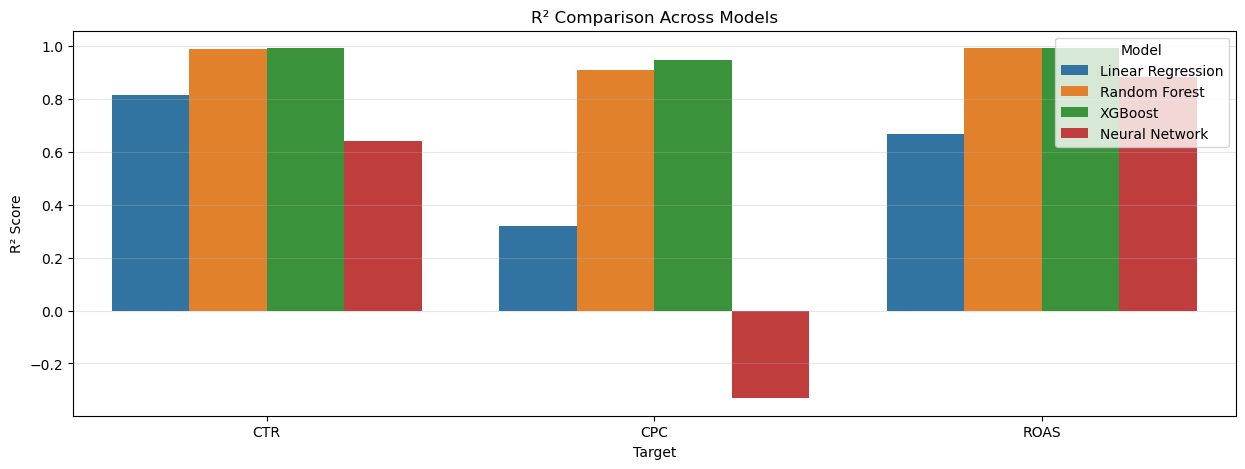

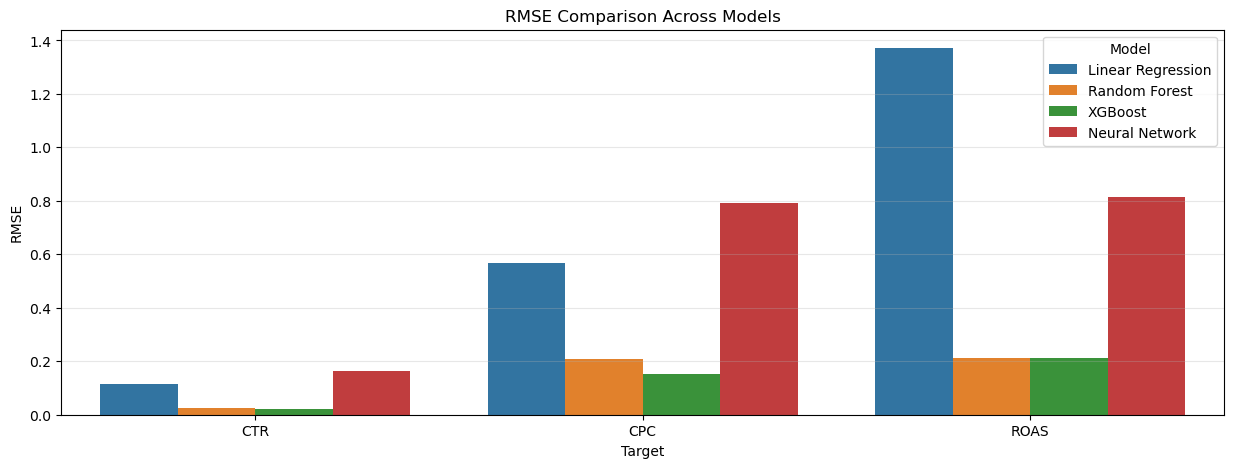

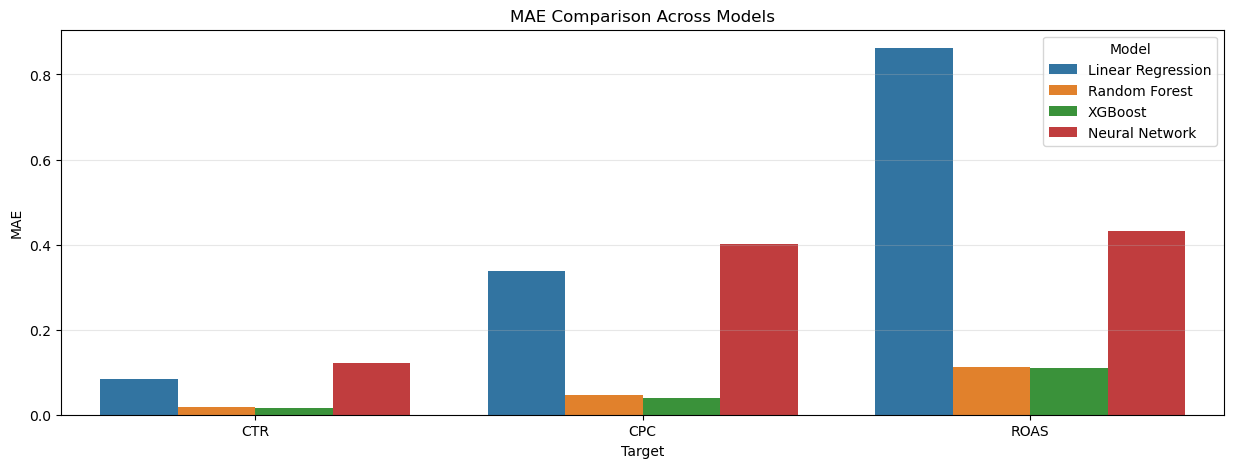

In [18]:
import seaborn as sns

# Combine results
final_results = pd.concat([results_lr, results_rf, results_xgb, results_mlp], ignore_index=True)

# Save to CSV (optional)
final_results.to_csv('model_comparison_results.csv', index=False)

# Set up visualization
plt.figure(figsize=(15, 5))
sns.barplot(data=final_results, x='Target', y='R2', hue='Model')
plt.title('R² Comparison Across Models')
plt.ylabel('R² Score')
plt.grid(axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=final_results, x='Target', y='RMSE', hue='Model')
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.grid(axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=final_results, x='Target', y='MAE', hue='Model')
plt.title('MAE Comparison Across Models')
plt.ylabel('MAE')
plt.grid(axis='y', alpha=0.3)
plt.show()
